# playground series - s5e3 

binary prediction with a rainfall dataset 

## importing libraries 

In [95]:
import pandas as pd
import numpy as np

In [96]:
train = pd.read_csv('./playground-series-s5e3/train.csv')
test = pd.read_csv('./playground-series-s5e3/test.csv')


# training data
X_train = train.drop(columns=['rainfall'])
y_train = train['rainfall']

## data visualization

<Axes: >

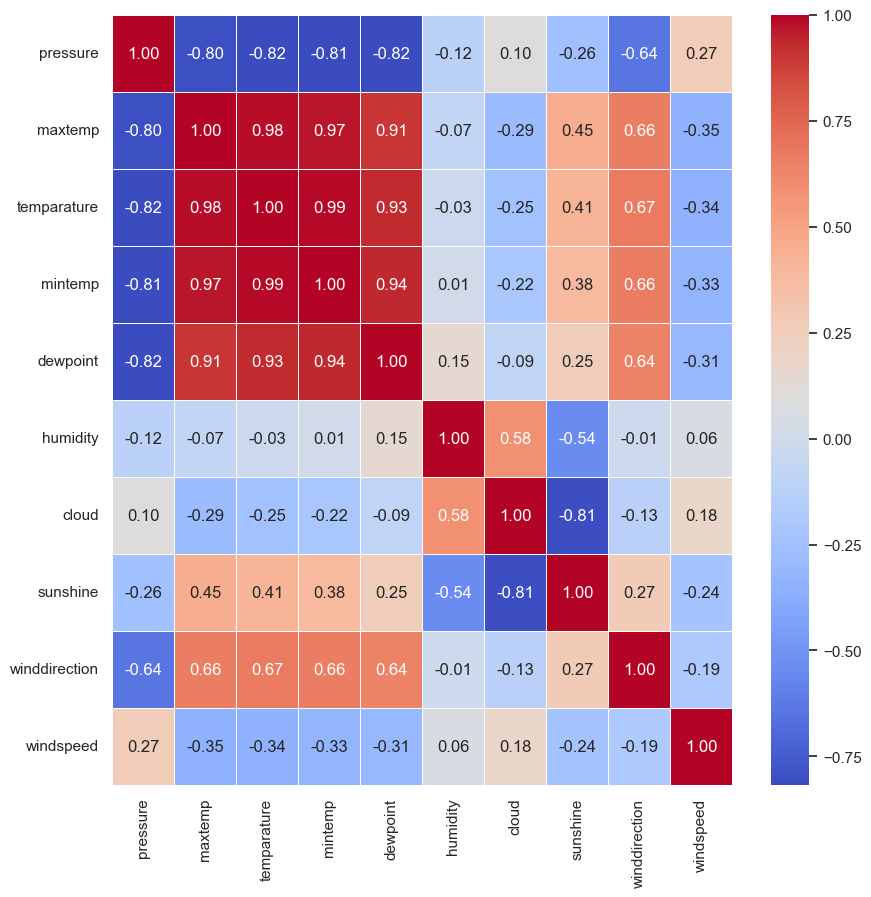

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')

NUMERIC_COLS = ['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed']

# correlation matrix
d = pd.DataFrame(data=X_train, columns=NUMERIC_COLS)
corr = d.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

## machine learning - logistic regression

preprocessing techniques:
* scaling our data

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[NUMERIC_COLS] = pd.DataFrame(scaler.fit_transform(X_train[NUMERIC_COLS]), columns=NUMERIC_COLS, index=X_train.index)

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(X_train,y_train)

X_test = pd.read_csv('./playground-series-s5e3/test.csv')

# null value checking
# X_test.isna().sum()
# X_test.loc[X_test['winddirection'].isna()]


X_test.fillna(X_test['winddirection'].mean(),inplace=True)

X_test = X_test[X_train.columns]
X_test[NUMERIC_COLS] = scaler.transform(X_test[NUMERIC_COLS])

# X_test.shape

y_pred = lr.predict(X_test)
# print(pd.Series(y_pred).head())

submission = pd.DataFrame({
    'id': X_test['id'],
    'target': y_pred
})

submission.to_csv('./submissions/e5s3_lr.csv', index=False)
print(f'Submission filed saved.')

Submission filed saved.


/Users/ryanavancena/Downloads/coding stuff/kaggle/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Score: 0.75060

## machine learning - multilayer perceptron